<a href="https://colab.research.google.com/github/RafalDoroz/mun/blob/main/decisiontree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# Importujemy potrzebne biblioteki
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_text
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# Wczytujemy dane - w tym przypadku zestaw Iris
iris = load_iris()
X = iris.data  # dane wejściowe
y = iris.target  # etykiety (klasy)




Zbiór danych Iris:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


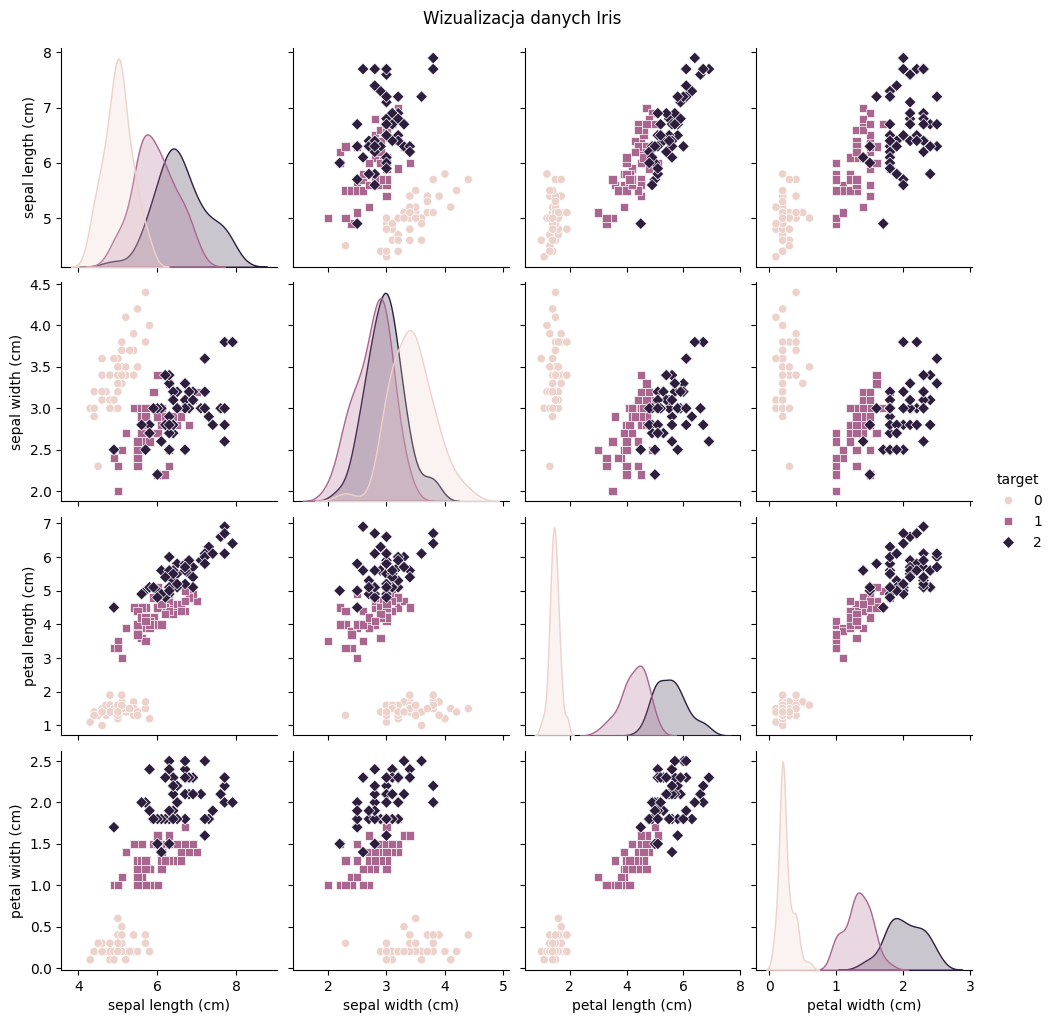

In [11]:
# Tworzymy DataFrame z danymi Iris
iris_df = pd.DataFrame(data=X, columns=iris.feature_names)
iris_df['target'] = y

# Wyświetlamy pierwsze 5 wierszy zbioru danych
print("Zbiór danych Iris:")
print(iris_df.head())

# Wizualizacja danych za pomocą wykresów
sns.pairplot(iris_df, hue="target", markers=["o", "s", "D"])
plt.suptitle("Wizualizacja danych Iris", y=1.02)
plt.show()

In [3]:
# Podzielmy dane na zbiór treningowy i testowy (70% - trening, 30% - test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [4]:
# Inicjalizujemy klasyfikator drzewa decyzyjnego
clf = DecisionTreeClassifier()



In [5]:
# Trenujemy model na danych treningowych
clf.fit(X_train, y_train)



DecisionTreeClassifier()

In [12]:
# Dokonujemy predykcji na danych testowych
y_pred = clf.predict(X_test)



In [13]:
# Wyświetlamy dokładność modelu
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Dokładność modelu: {accuracy}')



Dokładność modelu: 1.0


In [15]:
# Wyświetlamy macierz pomyłek
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(f"Macierz pomyłek:\n{conf_matrix}")

Macierz pomyłek:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


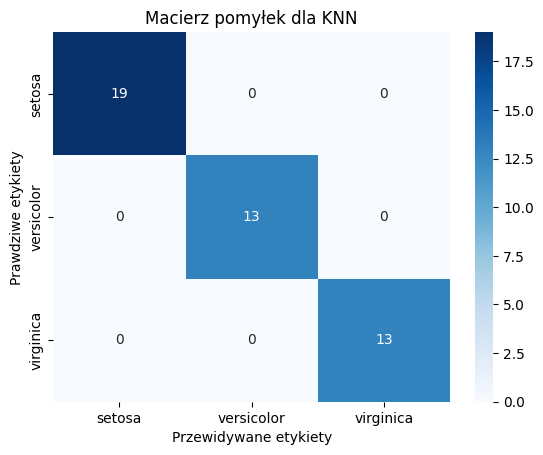

In [16]:
# Wizualizacja macierzy pomyłek
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Przewidywane etykiety')
plt.ylabel('Prawdziwe etykiety')
plt.title('Macierz pomyłek dla KNN')
plt.show()

In [14]:
# Wyświetlamy drzewo w formie tekstowej
tree_rules = export_text(clf, feature_names=iris.feature_names)
print("Reguły drzewa decyzyjnego:")
print(tree_rules)

Reguły drzewa decyzyjnego:
|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal length (cm) <= 4.75
|   |   |--- petal width (cm) <= 1.60
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.60
|   |   |   |--- class: 2
|   |--- petal length (cm) >  4.75
|   |   |--- petal width (cm) <= 1.75
|   |   |   |--- petal length (cm) <= 4.95
|   |   |   |   |--- class: 1
|   |   |   |--- petal length (cm) >  4.95
|   |   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |   |--- sepal length (cm) <= 6.95
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- sepal length (cm) >  6.95
|   |   |   |   |   |   |--- class: 2
|   |   |--- petal width (cm) >  1.75
|   |   |   |--- petal length (cm) <= 4.85
|   |   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |   |--- class: 